# **Machine Leaning**
## *Lab Session 2*

In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

#### A1. Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following activities.

1. What is the dimensionality of the vector space for this data?
2. How many vectors exist in this vector space?
3. What is the rank of Matrix A?
4. Using Pseudo-Inverse find the cost of each product available for sale.
   

In [2]:
data1 = pd.read_excel("../questions/lab_2_data.xlsx", sheet_name=0)
data1 = data1.dropna(axis = 1) # dropping all the columsn with NaN
data1

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [3]:
A = data1.iloc[:, 1:-1].values # A = all the columns except first and last one
C = data1.iloc[:,-1].values.reshape(-1,1) # taking only the last column

dimensionality = A.shape[1]
num_of_vectors = A.shape[0]
rank_A = np.linalg.matrix_rank(A)
cost_of_each = np.linalg.pinv(A) @ C

In [4]:
print("Dimensionality : ", dimensionality, "\n",
        "Number of Vectors : ", num_of_vectors, "\n",
        "Matrix Rank : ", rank_A, "\n",
        "Cost of Candy : ", cost_of_each[0].item(), "\n",
        "Cost of Mango : ", cost_of_each[1].item(), "\n",
        "Cost of Milk : ", cost_of_each[2].item(), "\n",
     )

Dimensionality :  3 
 Number of Vectors :  10 
 Matrix Rank :  3 
 Cost of Candy :  1.0000000000000027 
 Cost of Mango :  55.0 
 Cost of Milk :  17.99999999999999 



#### A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.

In [5]:
print("Model vector X: ")
print(cost_of_each)

Model vector X: 
[[ 1.]
 [55.]
 [18.]]


#### A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior.

In [6]:
classifications = ['RICH' if payment > 200 else 'POOR' for payment in C]
predicted_payments = A @ cost_of_each

for i in range(len(C)):
    print("Customer {}: {} (Payment: Rs. {}, Predicted: Rs. {:.2f})".format(
        i+1, 
        classifications[i], 
        C[i], 
        predicted_payments[i].item()))

Customer 1: RICH (Payment: Rs. [386], Predicted: Rs. 386.00)
Customer 2: RICH (Payment: Rs. [289], Predicted: Rs. 289.00)
Customer 3: RICH (Payment: Rs. [393], Predicted: Rs. 393.00)
Customer 4: POOR (Payment: Rs. [110], Predicted: Rs. 110.00)
Customer 5: RICH (Payment: Rs. [280], Predicted: Rs. 280.00)
Customer 6: POOR (Payment: Rs. [167], Predicted: Rs. 167.00)
Customer 7: RICH (Payment: Rs. [271], Predicted: Rs. 271.00)
Customer 8: RICH (Payment: Rs. [274], Predicted: Rs. 274.00)
Customer 9: POOR (Payment: Rs. [148], Predicted: Rs. 148.00)
Customer 10: POOR (Payment: Rs. [198], Predicted: Rs. 198.00)


#### A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the following after loading the data to your programming platform.
* Calculate the mean and variance of the Price data present in column D.
* Select the price data for all Wednesdays and calculate the sample mean. Compare the mean with the population mean and note your observations.
* Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations.
* From the Chg% (available in column I) find the probability of making a loss over the stock.
* Calculate the probability of making a profit on Wednesday.
* Calculate the conditional probability of making profit, given that today is Wednesday.
* Make a scatter plot of Chg% data against the day of the week
  

In [7]:
data2 = pd.read_excel("../questions/lab_2_data.xlsx", sheet_name=1)
data2 = data2.dropna(axis=1)
data2

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362



IRCTC Stock Price Analysis
--------------------------
Population Statistics:
Mean Price: Rs. 1560.66
Variance: 58732.37

Wednesday Statistics:
Number of Wednesdays: 50
Wednesday Mean Price: Rs. 1550.71

Comparison:
Difference (Population Mean - Wednesday Mean): 9.96

April Statistics:
April Mean Price: Rs. 1698.95

Comparison:
Difference (Population Mean - April Mean): -138.29

Probability of making a loss: 0.4980

Probability of making a profit on Wednesday: 0.4200

Conditional probability of profit given Wednesday: 0.4200
Overall probability of profit: 0.4980



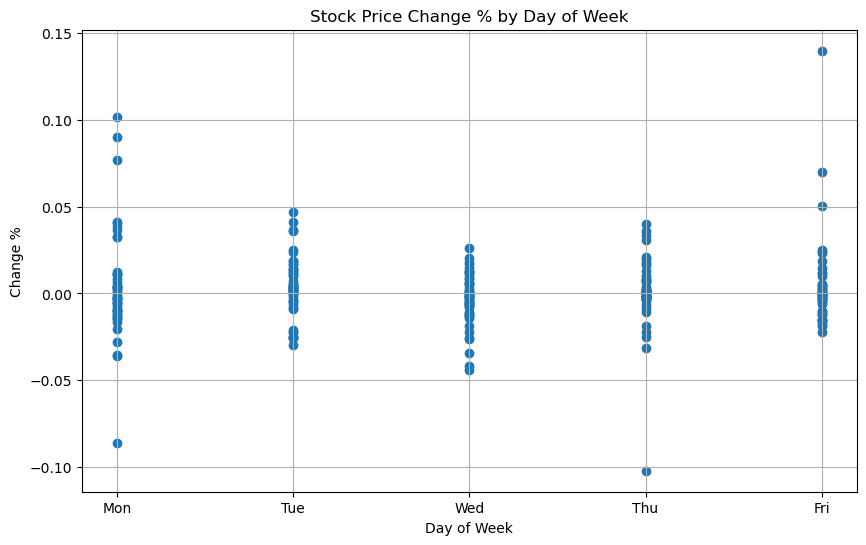

In [8]:
prices = data2["Price"].values
mean_price = statistics.mean(prices)
variance_price = statistics.variance(prices)

wed_data = data2[data2["Day"] == "Wed"]
wed_price = wed_data["Price"].values
wed_mean = statistics.mean(wed_price)

apr_data = data2[data2['Month'] == "Apr"]
apr_price = apr_data["Price"].values
apr_mean = statistics.mean(apr_price)

loss_prob = len(list(filter(lambda x: x < 0, data2['Chg%']))) / len(data2)

wed_profit = len(wed_data[wed_data['Chg%'] > 0]) / len(wed_data)

total_profit_days = len(data2[data2['Chg%'] > 0])
profit_probability = total_profit_days / len(data2)

print("\nIRCTC Stock Price Analysis")
print("--------------------------")
print(f"Population Statistics:")
print(f"Mean Price: Rs. {mean_price:.2f}")
print(f"Variance: {variance_price:.2f}")

print(f"\nWednesday Statistics:")
print(f"Number of Wednesdays: {len(wed_price)}")
print(f"Wednesday Mean Price: Rs. {wed_mean:.2f}")

print(f"\nComparison:")
print(f"Difference (Population Mean - Wednesday Mean): {mean_price - wed_mean:.2f}")

print(f"\nApril Statistics:")
print(f"April Mean Price: Rs. {apr_mean:.2f}")

print(f"\nComparison:")
print(f"Difference (Population Mean - April Mean): {mean_price - apr_mean:.2f}")

print(f"\nProbability of making a loss: {loss_prob:.4f}")

print(f"\nProbability of making a profit on Wednesday: {wed_profit:.4f}")

print(f"\nConditional probability of profit given Wednesday: {wed_profit:.4f}")
print(f"Overall probability of profit: {profit_probability:.4f}\n")

day_map = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5}
data2['Day_Num'] = data2['Day'].map(day_map)

plt.figure(figsize=(10, 6))
plt.scatter(data2['Day_Num'], data2['Chg%'])
plt.xticks(range(1, 6), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.xlabel('Day of Week')
plt.ylabel('Change %')
plt.title('Stock Price Change % by Day of Week')
plt.grid(True)
plt.show()

#### A5. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the following tasks:
* Study each attribute and associated values present. Identify the datatype (nominal etc.) for the attribute.
* For categorical attributes, identify the encoding scheme to be employed.
* Study the data range for numeric variables.
* Study the presence of missing values in each attribute.
* Study presence of outliers in data.
* For numeric variables, calculate the mean and variance (or standard deviation).

In [9]:
data3 = pd.read_excel("../questions/lab_2_data.xlsx", sheet_name=2)
data3 = data3.dropna(axis=1)
data3

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,M,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,NO CONDITION
9168,870119023,22,M,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,NO CONDITION
9169,870119025,69,M,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I
9170,870119027,47,F,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,NO CONDITION


In [10]:
data3.replace('?', np.nan, inplace=True)

# Identify categorical columns
categorical_cols = data3.select_dtypes(include=['object']).columns.tolist()

# Convert numeric columns to float
numeric_cols = [col for col in data3.columns if col not in categorical_cols]
data3[numeric_cols] = data3[numeric_cols].astype(float)

# Identify missing values
missing_values = data3.isnull().sum()

# Compute statistics for numeric attributes
numeric_stats = data3[numeric_cols].describe().T

# Label Encode binary categorical variables
binary_cols = [col for col in categorical_cols if data3[col].nunique() == 2]
for col in binary_cols:
    data3[col] = data3[col].map({'t': 1, 'f': 0})

# One-Hot Encode nominal categorical variables
nominal_cols = list(set(categorical_cols) - set(binary_cols) - {"Condition"})
data3 = pd.get_dummies(data3, columns=nominal_cols, drop_first=True)

# Data Imputation
for col in numeric_cols:
    if numeric_stats.loc[col, 'std'] / numeric_stats.loc[col, 'mean'] > 1:  # Check for outliers
        data3[col] = data3[col].fillna(data3[col].median())
    else:
        data3[col] = data3[col].fillna(data3[col].mean())

for col in categorical_cols:
    if col in data3.columns and not data3[col].mode().empty:
        data3[col] = data3[col].fillna(data3[col].mode()[0])

# Summary
print("Missing Values:\n", data3.isnull().sum())
print("\nNumeric Statistics:\n", numeric_stats)
print("\nCategorical Columns:", categorical_cols)
print("\nBinary Encoded Columns:", binary_cols)
print("\nOne-Hot Encoded Columns:", nominal_cols)


Missing Values:
 Record ID                       0
age                             0
sex                          9172
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                             0
T3 measured                     0
T3                              0
TT4 measured                    0
TT4                             0
T4U measured                    0
T4U                             0
FTI measured                    0
FTI                             0
TBG measured                    0
TBG                            

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_1035/2432317790.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data3.replace('?', np.nan, inplace=True)


#### A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data variables. Employ following guidance.
* Mean may be used when the attribute is numeric with no outliers
* Median may be employed for attributes which are numeric and contain outliers
* Mode may be employed for categorical attributes

In [11]:
for col in numeric_cols:
    if numeric_stats.loc[col, 'std'] / numeric_stats.loc[col, 'mean'] > 1:  # Check for outliers
        data3[col].fillna(data3[col].median())
    else:
        data3[col].fillna(data3[col].mean())

for col in categorical_cols:
    if col in data3.columns:  # Ensure column exists
        mode_value = data3[col].mode()
        if not mode_value.empty:
            data3[col] = data3[col].fillna(mode_value[0])
data3

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,FTI measured,FTI,TBG measured,TBG,Condition,referral source_SVHC,referral source_SVHD,referral source_SVI,referral source_WEST,referral source_other
0,840801013.0,29.0,NaN,0,0,0,0,0,0,0,...,0,113.640746,0,29.870057,NO CONDITION,False,False,False,False,True
1,840801014.0,29.0,NaN,0,0,0,0,0,0,0,...,0,113.640746,0,29.870057,NO CONDITION,False,False,False,False,True
2,840801042.0,41.0,NaN,0,0,0,0,0,0,0,...,0,113.640746,1,11.000000,NO CONDITION,False,False,False,False,True
3,840803046.0,36.0,NaN,0,0,0,0,0,0,0,...,0,113.640746,1,26.000000,NO CONDITION,False,False,False,False,True
4,840803047.0,32.0,NaN,0,0,0,0,0,0,0,...,0,113.640746,1,36.000000,S,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022.0,56.0,NaN,0,0,0,0,0,0,0,...,1,77.000000,0,29.870057,NO CONDITION,False,False,True,False,False
9168,870119023.0,22.0,NaN,0,0,0,0,0,0,0,...,1,99.000000,0,29.870057,NO CONDITION,False,False,True,False,False
9169,870119025.0,69.0,NaN,0,0,0,0,0,0,0,...,1,89.000000,0,29.870057,I,False,False,True,False,False
9170,870119027.0,47.0,NaN,0,0,0,0,0,0,0,...,1,88.000000,0,29.870057,NO CONDITION,False,False,False,False,True


#### A7. Data Normalization / Scaling: from the data study, identify the attributes which may need normalization. Employ appropriate normalization techniques to create normalized set of data.

In [12]:
def handle_missing_values(df):
    # Replace '?' with NaN
    return df.replace('?', np.nan)

def custom_min_max_normalization(column):
    """Min-Max normalization: (x - min) / (max - min)"""
    col_min = column.min()
    col_max = column.max()
    return (column - col_min) / (col_max - col_min) if col_max != col_min else column

def custom_z_score_normalization(column):
    """Z-score normalization: (x - mean) / standard deviation"""
    col_mean = column.mean()
    col_std = column.std()
    return (column - col_mean) / col_std if col_std != 0 else column

def custom_median_normalization(column):
    """Median-based normalization: (x - median) / IQR"""
    col_median = column.median()
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return (column - col_median) / IQR if IQR != 0 else column

def normalize_thyroid_data(data):
    # Handle missing values
    df = handle_missing_values(data)
    
    # Select numeric columns
    numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
    
    # Remove rows with all numeric columns as NaN
    df = df.dropna(subset=numeric_columns, how='all')
    
    # Convert to float
    df[numeric_columns] = df[numeric_columns].astype(float)
    
    # Fill missing values with median
    for col in numeric_columns:
        df[col] = df[col].fillna(df[col].median())
    
    # Create normalized datasets
    normalized_datasets = {
        'Min-Max': df.copy(),
        'Z-Score': df.copy(),
        'Median': df.copy()
    }
    
    # Apply normalization techniques
    for col in numeric_columns:
        normalized_datasets['Min-Max'][col] = custom_min_max_normalization(df[col])
        normalized_datasets['Z-Score'][col] = custom_z_score_normalization(df[col])
        normalized_datasets['Median'][col] = custom_median_normalization(df[col])
    
    return normalized_datasets

normalized_data = normalize_thyroid_data(data3)

# Print summary statistics for each normalization method
for method, dataset in normalized_data.items():
    print(f"\n{method} Normalization Summary:")
    print(dataset[['age', 'TSH', 'T3', 'TT4']].describe())


Min-Max Normalization Summary:
               age          TSH           T3          TT4
count  9172.000000  9172.000000  9172.000000  9172.000000
mean      0.001107     0.009175     0.106999     0.178429
std       0.018069     0.043535     0.041843     0.061216
min       0.000000     0.000000     0.000000     0.000000
25%       0.000549     0.001104     0.091922     0.143813
50%       0.000824     0.002632     0.106999     0.173913
75%       0.001023     0.004708     0.119777     0.204013
max       1.000000     1.000000     1.000000     1.000000

Z-Score Normalization Summary:
                age           TSH            T3           TT4
count  9.172000e+03  9.172000e+03  9.172000e+03  9.172000e+03
mean   6.197494e-18 -2.014186e-17  1.634589e-16 -3.199456e-16
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -6.128146e-02 -2.107559e-01 -2.557180e+00 -2.914728e+00
25%   -3.087546e-02 -1.854021e-01 -3.603230e-01 -5.654694e-01
50%   -1.567246e-02 -1.502969e-01  2.95636

#### A8. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. Use first vector for each document for this. Compare the values for JC and SMC and judge the appropriateness of each of them.

$$JC = \frac{f_{11}}{f_{01} + f_{10} + f_{11}}$$
$$SMC = \frac{f_{11} + f_{00}}{f_{00} + f_{01} + f_{10} + f_{11}}$$

In [13]:
v1 = data3.iloc[0]
v2 = data3.iloc[1]

# Identify binary attributes
binary_attributes = [col for col in data3.columns if set(data3[col].unique()).issubset({0, 1})]

# Initialize counters
f11 = f10 = f01 = f00 = 0

# Iterate over binary attributes
for attr in binary_attributes:
    val1 = v1[attr]
    val2 = v2[attr]
    if val1 == 1 and val2 == 1:
        f11 += 1
    elif val1 == 1 and val2 == 0:
        f10 += 1
    elif val1 == 0 and val2 == 1:
        f01 += 1
    elif val1 == 0 and val2 == 0:
        f00 += 1

# Calculate Jaccard Coefficient (JC)
jc = f11 / (f01 + f10 + f11)

# Calculate Simple Matching Coefficient (SMC)
smc = (f11 + f00) / (f00 + f01 + f10 + f11)

print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

Jaccard Coefficient (JC): 0.4
Simple Matching Coefficient (SMC): 0.88


#### A9. Cosine Similarity Measure: Now take the complete vectors for these two observations (including all the attributes). Calculate the Cosine similarity between the documents by using the second feature vector for each document.

In [14]:
def preprocess_data(data):
    # Replace '?' with NaN
    df = data.replace('?', np.nan)
    
    # Convert columns to appropriate types
    numeric_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
    categorical_cols = [col for col in df.columns if col not in numeric_cols and col != 'Record ID']
    
    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, columns=categorical_cols)
    
    # Fill numeric missing values with median
    for col in numeric_cols:
        df_encoded[col] = df_encoded[col].fillna(df_encoded[col].median())
    
    return df_encoded

def cosine_similarity(vec1, vec2):
    # Dot product
    dot_product = np.dot(vec1, vec2)
    
    # Magnitudes
    magnitude1 = np.linalg.norm(vec1)
    magnitude2 = np.linalg.norm(vec2)
    
    # Cosine similarity
    return dot_product / (magnitude1 * magnitude2)

# Preprocess data
df_processed = preprocess_data(data3)

# Select feature vectors (excluding first two rows to ensure valid comparison)
vec1 = df_processed.iloc[1].values
vec2 = df_processed.iloc[2].values

# Calculate cosine similarity
similarity = cosine_similarity(vec1, vec2)

print("Cosine Similarity:", similarity)

Cosine Similarity: 0.9999999999999997


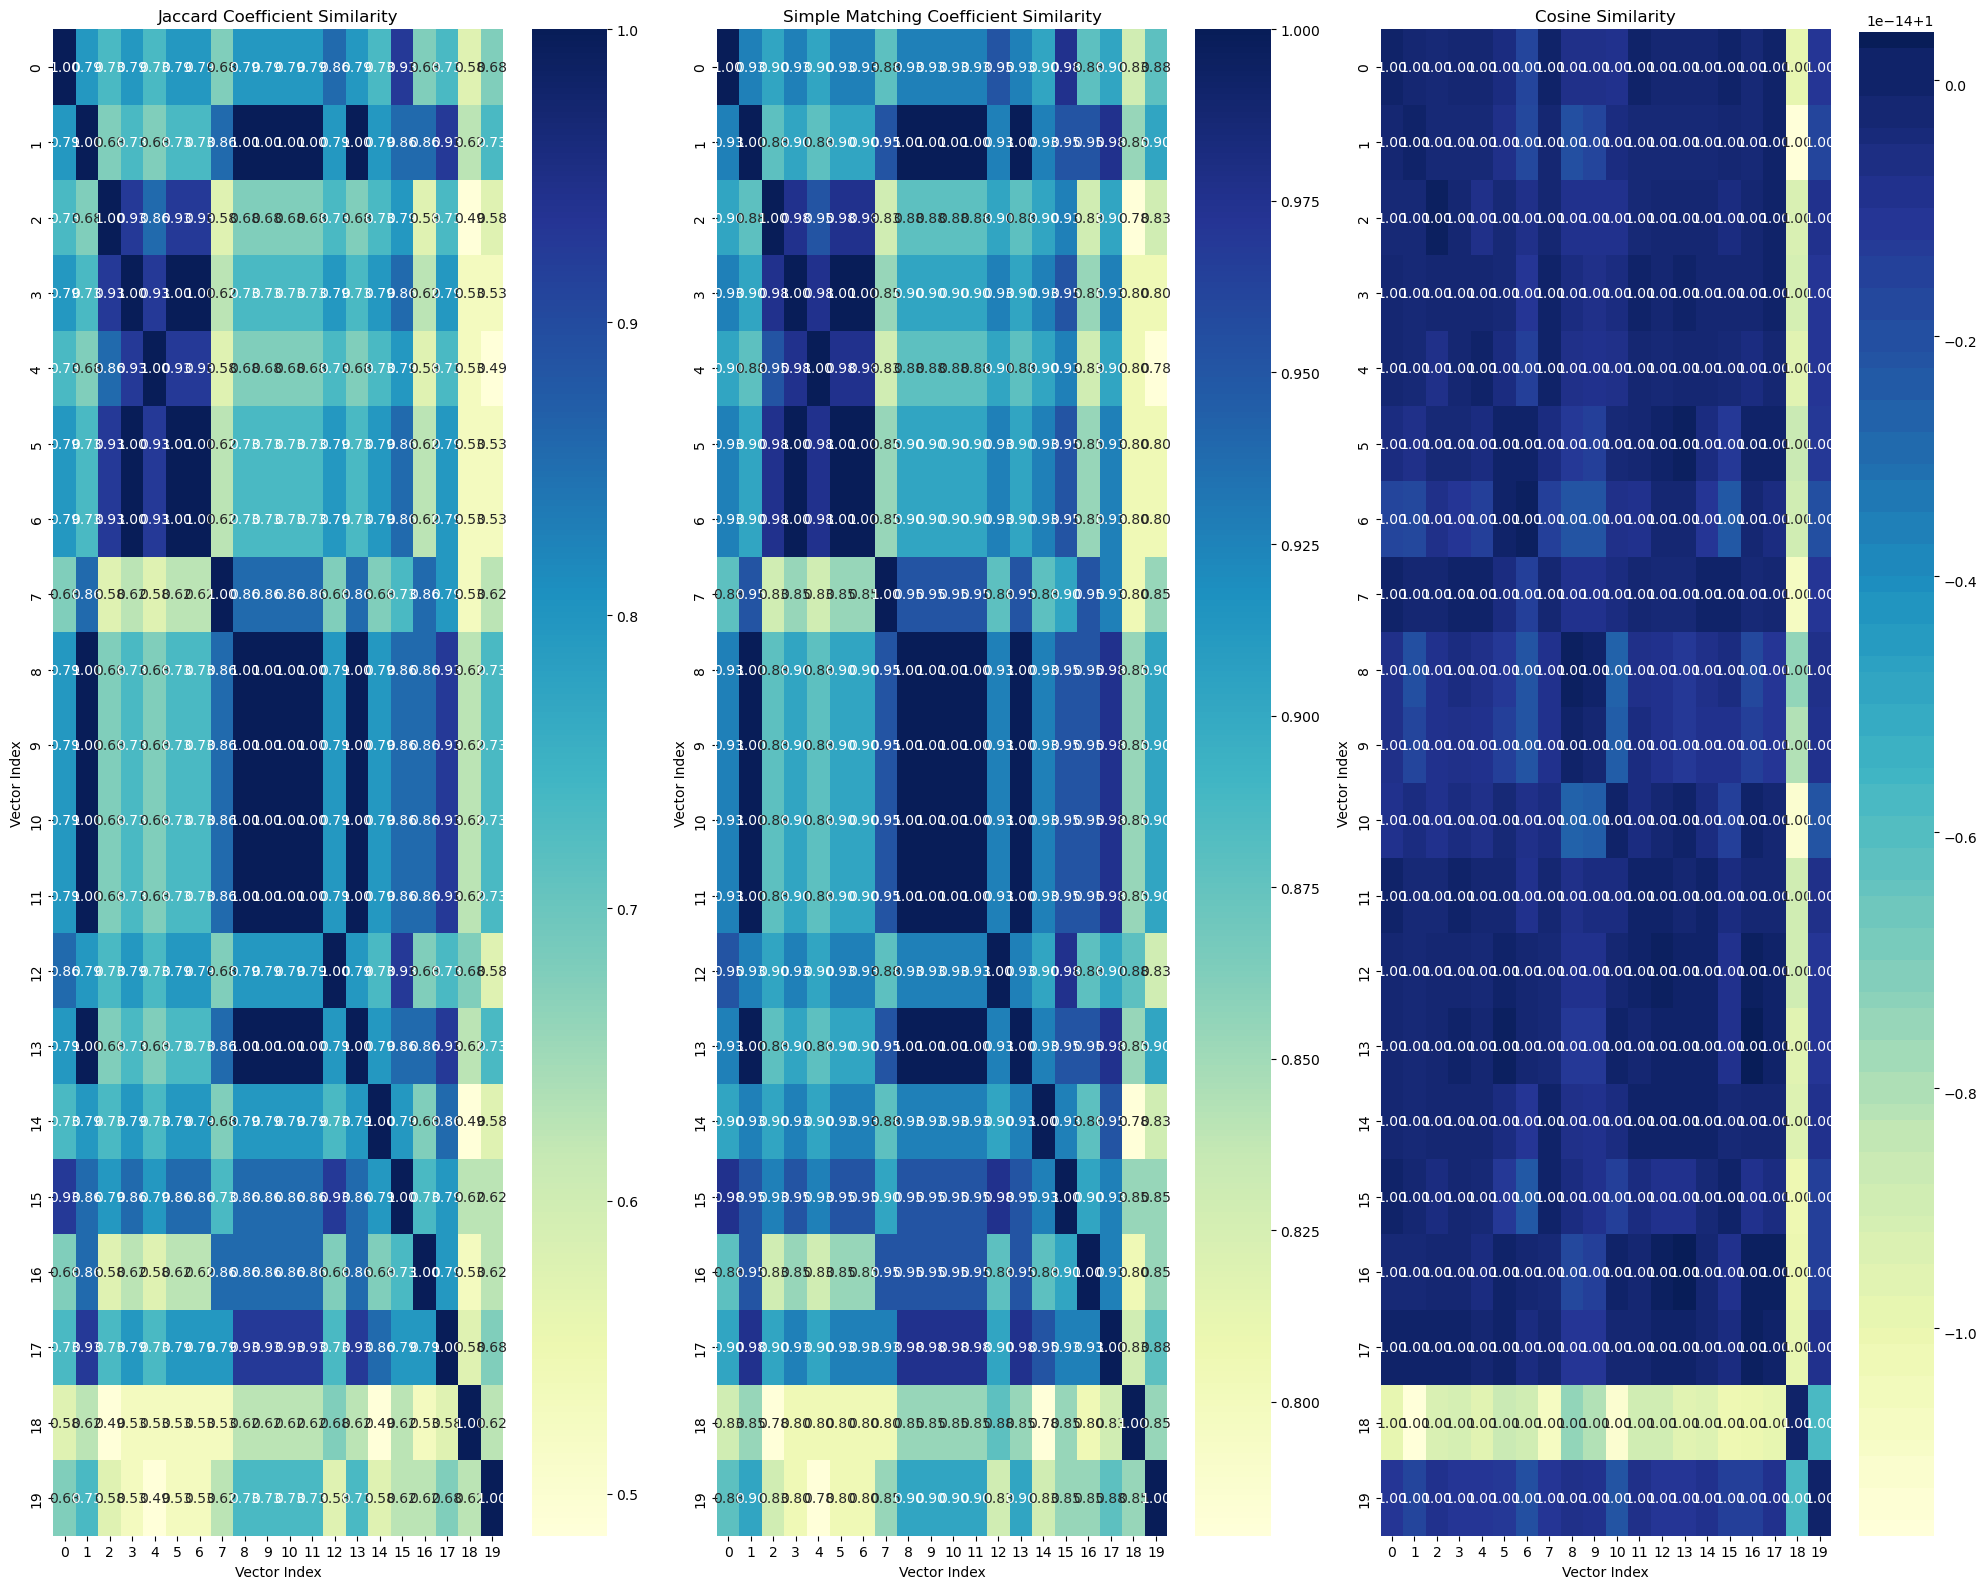

In [15]:
def calculate_similarities(df_processed, first_n=20):
    # Extract first n vectors
    vectors = df_processed.iloc[:first_n].values
    
    # Initialize similarity matrices
    jc_matrix = np.zeros((first_n, first_n))
    smc_matrix = np.zeros((first_n, first_n))
    cos_matrix = np.zeros((first_n, first_n))
    
    # Calculate similarities
    for i in range(first_n):
        for j in range(first_n):
            # Binary attributes (assuming binary columns)
            binary_attrs = [col for col in df_processed.columns 
                            if set(df_processed[col].unique()).issubset({0, 1})]
            
            # Similarity calculations
            v1 = df_processed.iloc[i]
            v2 = df_processed.iloc[j]
            
            # Jaccard Coefficient
            f11 = f10 = f01 = f00 = 0
            for attr in binary_attrs:
                if v1[attr] == 1 and v2[attr] == 1:
                    f11 += 1
                elif v1[attr] == 1 and v2[attr] == 0:
                    f10 += 1
                elif v1[attr] == 0 and v2[attr] == 1:
                    f01 += 1
                elif v1[attr] == 0 and v2[attr] == 0:
                    f00 += 1
            
            jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) > 0 else 0
            smc = (f11 + f00) / (f00 + f01 + f10 + f11)
            
            # Cosine Similarity
            cos = np.dot(vectors[i], vectors[j]) / (np.linalg.norm(vectors[i]) * np.linalg.norm(vectors[j]))
            
            jc_matrix[i, j] = jc
            smc_matrix[i, j] = smc
            cos_matrix[i, j] = cos
    
    return jc_matrix, smc_matrix, cos_matrix

# Preprocess the data
df_processed = preprocess_data(data3)

# Calculate similarities
jc_matrix, smc_matrix, cos_matrix = calculate_similarities(df_processed)

# Create heatmap visualizations
plt.figure(figsize=(20, 16))

# Jaccard Coefficient Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Jaccard Coefficient Similarity')
plt.xlabel('Vector Index')
plt.ylabel('Vector Index')

# Simple Matching Coefficient Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Simple Matching Coefficient Similarity')
plt.xlabel('Vector Index')
plt.ylabel('Vector Index')

# Cosine Similarity Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(cos_matrix, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Cosine Similarity')
plt.xlabel('Vector Index')
plt.ylabel('Vector Index')

plt.tight_layout()
plt.show()